# Retrieve weather data through the API

We are using Meteostat's API to retrieve weather information.

Link to the documentation: https://dev.meteostat.net/api

### Steps to retrieve the weather data

- Request an API key
- Collect the final country list of the World Happiness Report
- Find the capitals of those countries
- To request daily weather data, we must pass the latitude and longitude of a weather station
- We can find the latitude and longitude by first calling the API to retrieve information about a particular weather station in a certain city. For sake of simplicity, we decided to focus on the capital cities
- Call the 'Finding Stations' part of the API for certain cities and save the latitude and longitude
- Call the 'Daily Data' part of the API with the required latitude and longitude information to retrieve weather data

## Imports

In [81]:
import pandas as pd
import requests
import json
import getpass
from countryinfo import CountryInfo

# Request the API key and test the access

In [82]:
key = ("apikey", getpass.getpass())

········


In [83]:
url = "https://api.meteostat.net/v2/stations/search?query=helsinki"

In [84]:
headers = {"x-api-key": getpass.getpass()}

········


In [85]:
r = requests.get(url, headers=headers)
results = r.json()

In [86]:
type(r)

requests.models.Response

### After many negative responses, we got a positive response

In [87]:
r.status_code

200

### First test results with a manual input of Helsinki

Need to make sure we retrieve information of an active weather station

In [88]:
results

{'meta': {'exec_time': 0.038, 'generated': '2020-08-27 17:04:38'},
 'data': [{'id': '02974',
   'name': {'en': 'Helsinki-Vantaa'},
   'country': 'FI',
   'region': None,
   'national': None,
   'wmo': '02974',
   'icao': 'EFHK',
   'iata': 'HEL',
   'latitude': 60.3167,
   'longitude': 24.9667,
   'elevation': 51,
   'timezone': 'Europe/Helsinki',
   'active': True},
  {'id': '02975',
   'name': {'en': 'Helsinki-Malmi'},
   'country': 'FI',
   'region': None,
   'national': None,
   'wmo': '02975',
   'icao': 'EFHF',
   'iata': 'HEM',
   'latitude': 60.25,
   'longitude': 25.05,
   'elevation': 17,
   'timezone': 'Europe/Helsinki',
   'active': True},
  {'id': '02978',
   'name': {'en': 'Helsinki Kaisaniemi / Harju'},
   'country': 'FI',
   'region': None,
   'national': None,
   'wmo': '02978',
   'icao': None,
   'iata': None,
   'latitude': 60.1833,
   'longitude': 24.95,
   'elevation': 4,
   'timezone': 'Europe/Helsinki',
   'active': True},
  {'id': '02795',
   'name': {'en': 'He

In [89]:
'''

# function of gathering the latitude and longitude of the weather stations

# list of all capital cities of selected countries in the World Happiness Ranking
stations_list = ["asdf", "asldkf", ....]

lat = []   #"latitude": 45.6205,      (lat=)
lon = []   #"longitude": -122.6565,   (lon=) 

def weather_stations(...):
    key = ("apikey", getpass.getpass())
    headers = {"x-api-key": getpass.getpass()}
    for station in stations_list:
        url = f"https://api.meteostat.net/v2/stations/search?query={station}&limit=1" 
        #is it 1 call per city or 1 call for the whole list?
        if element 2 , 13 # if "active":True:
            lat.append(station["latitude"])
            lon.append(station["longitude"])
        else:
            print(station, "inactive")
    return ... 
     
# I want to get back: city name, latitude + longitude, 

# in order to get the daily (x365days = yearly) weather data for the capital city
# we need to specify the lat + lon in the call 


#inspiration
def translate(to_translate, languages):
    auth = ("apikey", getpass.getpass())
    headers = {"Content-Type":"application/json"}
    url = "https://api.eu-de.language-translator.watson.cloud.ibm.com/instances/3fd0629c-22b6-4f28-b90e-5676d0cc30fc/v3/translate?version=2018-05-01"
    data = {"text": to_translate, "model_id": languages}
    
    response = requests.post(url=url,
                             headers=headers, 
                             auth=auth, 
                             data=json.dumps(data))
    return response.json()["translations"]

'''

'\n\n# function of gathering the latitude and longitude of the weather stations\n\n# list of all capital cities of selected countries in the World Happiness Ranking\nstations_list = ["asdf", "asldkf", ....]\n\nlat = []   #"latitude": 45.6205,      (lat=)\nlon = []   #"longitude": -122.6565,   (lon=) \n\ndef weather_stations(...):\n    key = ("apikey", getpass.getpass())\n    headers = {"x-api-key": getpass.getpass()}\n    for station in stations_list:\n        url = f"https://api.meteostat.net/v2/stations/search?query={station}&limit=1" \n        #is it 1 call per city or 1 call for the whole list?\n        if element 2 , 13 # if "active":True:\n            lat.append(station["latitude"])\n            lon.append(station["longitude"])\n        else:\n            print(station, "inactive")\n    return ... \n     \n# I want to get back: city name, latitude + longitude, \n\n# in order to get the daily (x365days = yearly) weather data for the capital city\n# we need to specify the lat + lon

# Import the final country list of the cleaned World Happiness Report

In [91]:
country_list_df = pd.read_csv("Country_final.csv")
country_list_df

,Unnamed: 0,Country_final
0,0,Mauritius
1,1,Austria
2,2,Iceland
3,3,South Korea
4,4,Bosnia and Herzegovina
...,...,...
136,136,New Zealand
137,137,Yemen
138,138,Hungary
139,139,Kyrgyzstan


In [92]:
country_list_df.columns[1]

'Country_final'

In [93]:
country_list_drop = country_list_df.drop('Unnamed: 0', axis=1)

In [94]:
country_list_test = country_list_drop.values.tolist()

In [95]:
country_list_test

[['Mauritius'],
 ['Austria'],
 ['Iceland'],
 ['South Korea'],
 ['Bosnia and Herzegovina'],
 ['Lithuania'],
 ['Malawi'],
 ['Uzbekistan'],
 ['Mauritania'],
 ['Slovakia'],
 ['Morocco'],
 ['Sweden'],
 ['Indonesia'],
 ['Myanmar'],
 ['Jamaica'],
 ['Ireland'],
 ['Zimbabwe'],
 ['Venezuela'],
 ['Rwanda'],
 ['United Kingdom'],
 ['Chad'],
 ['Italy'],
 ['Qatar'],
 ['Bolivia'],
 ['Burundi'],
 ['Iran'],
 ['Montenegro'],
 ['Cyprus'],
 ['Belarus'],
 ['Malaysia'],
 ['Congo (Brazzaville)'],
 ['Romania'],
 ['Finland'],
 ['Algeria'],
 ['Haiti'],
 ['Nepal'],
 ['Costa Rica'],
 ['Nicaragua'],
 ['Kosovo'],
 ['Spain'],
 ['Georgia'],
 ['Guinea'],
 ['Chile'],
 ['Ivory Coast'],
 ['Slovenia'],
 ['Germany'],
 ['Cameroon'],
 ['Jordan'],
 ['Iraq'],
 ['United States'],
 ['Afghanistan'],
 ['Russia'],
 ['El Salvador'],
 ['Ghana'],
 ['Argentina'],
 ['Sri Lanka'],
 ['Bulgaria'],
 ['Ethiopia'],
 ['Kuwait'],
 ['Moldova'],
 ['Ukraine'],
 ['Mali'],
 ['Niger'],
 ['Croatia'],
 ['France'],
 ['Uruguay'],
 ['Zambia'],
 ['Latvia'],

### Unpacking the country list

In [96]:
country_list = [country for sublist in country_list_test for country in sublist]

'''
this means:

country_list = []
for sublist in country_list_test:
    for country in sublist:
        country_list.append(country)
'''

'\nthis means:\n\ncountry_list = []\nfor sublist in country_list_test:\n    for country in sublist:\n        country_list.append(country)\n'

In [97]:
country_list

['Mauritius',
 'Austria',
 'Iceland',
 'South Korea',
 'Bosnia and Herzegovina',
 'Lithuania',
 'Malawi',
 'Uzbekistan',
 'Mauritania',
 'Slovakia',
 'Morocco',
 'Sweden',
 'Indonesia',
 'Myanmar',
 'Jamaica',
 'Ireland',
 'Zimbabwe',
 'Venezuela',
 'Rwanda',
 'United Kingdom',
 'Chad',
 'Italy',
 'Qatar',
 'Bolivia',
 'Burundi',
 'Iran',
 'Montenegro',
 'Cyprus',
 'Belarus',
 'Malaysia',
 'Congo (Brazzaville)',
 'Romania',
 'Finland',
 'Algeria',
 'Haiti',
 'Nepal',
 'Costa Rica',
 'Nicaragua',
 'Kosovo',
 'Spain',
 'Georgia',
 'Guinea',
 'Chile',
 'Ivory Coast',
 'Slovenia',
 'Germany',
 'Cameroon',
 'Jordan',
 'Iraq',
 'United States',
 'Afghanistan',
 'Russia',
 'El Salvador',
 'Ghana',
 'Argentina',
 'Sri Lanka',
 'Bulgaria',
 'Ethiopia',
 'Kuwait',
 'Moldova',
 'Ukraine',
 'Mali',
 'Niger',
 'Croatia',
 'France',
 'Uruguay',
 'Zambia',
 'Latvia',
 'Syria',
 'Armenia',
 'Australia',
 'Tajikistan',
 'Dominican Republic',
 'Kenya',
 'Brazil',
 'Greece',
 'Palestinian Territories',
 

In [98]:
len(country_list)

141

# Finding the country's capital

Installed a package to convert countries to capitals

Source: https://github.com/porimol/countryinfo

In [99]:
country = CountryInfo('Denmark')
print(country.capital())


Copenhagen


### Converting into a dictionary with { Country : Capital } and all countries which aren't recognized get 'N.A.' as the capital value

In [100]:
capitals = {}

for country in country_list:
    try:
        capital_output = CountryInfo(country)
        capitals.update({country : (capital_output.capital())})
    except Exception:
        capitals.update({country : ("N.A.")})        
        

In [101]:
capitals

{'Mauritius': 'Port Louis',
 'Austria': 'Vienna',
 'Iceland': 'Reykjavik',
 'South Korea': 'Seoul',
 'Bosnia and Herzegovina': 'Sarajevo',
 'Lithuania': 'Vilnius',
 'Malawi': 'Lilongwe',
 'Uzbekistan': 'Tashkent',
 'Mauritania': 'Nouakchott',
 'Slovakia': 'Bratislava',
 'Morocco': 'Rabat',
 'Sweden': 'Stockholm',
 'Indonesia': 'Jakarta',
 'Myanmar': 'N.A.',
 'Jamaica': 'Kingston',
 'Ireland': 'Dublin',
 'Zimbabwe': 'Harare',
 'Venezuela': 'Caracas',
 'Rwanda': 'Kigali',
 'United Kingdom': 'London',
 'Chad': "N'Djamena",
 'Italy': 'Rome',
 'Qatar': 'Doha',
 'Bolivia': 'Sucre',
 'Burundi': 'Bujumbura',
 'Iran': 'Tehran',
 'Montenegro': 'N.A.',
 'Cyprus': 'Nicosia',
 'Belarus': 'Minsk',
 'Malaysia': 'Kuala Lumpur',
 'Congo (Brazzaville)': 'N.A.',
 'Romania': 'Bucharest',
 'Finland': 'Helsinki',
 'Algeria': 'Algiers',
 'Haiti': 'Port-au-Prince',
 'Nepal': 'Kathmandu',
 'Costa Rica': 'San José',
 'Nicaragua': 'Managua',
 'Kosovo': 'N.A.',
 'Spain': 'Madrid',
 'Georgia': 'Tbilisi',
 'Guinea'

In [102]:
from collections import Counter

In [103]:
Counter(capitals.values())["N.A."]

6

In [104]:
len(capitals)

141

### Check the countries and capitals

In [105]:
capitals_na = [key for key in capitals if capitals[key] == "N.A."]

In [106]:
capitals_na

['Myanmar',
 'Montenegro',
 'Congo (Brazzaville)',
 'Kosovo',
 'Palestinian Territories',
 'Congo (Kinshasa)']

In [107]:
countries_without_na = list(capitals.keys()) 

In [108]:
countries_without_na

['Mauritius',
 'Austria',
 'Iceland',
 'South Korea',
 'Bosnia and Herzegovina',
 'Lithuania',
 'Malawi',
 'Uzbekistan',
 'Mauritania',
 'Slovakia',
 'Morocco',
 'Sweden',
 'Indonesia',
 'Myanmar',
 'Jamaica',
 'Ireland',
 'Zimbabwe',
 'Venezuela',
 'Rwanda',
 'United Kingdom',
 'Chad',
 'Italy',
 'Qatar',
 'Bolivia',
 'Burundi',
 'Iran',
 'Montenegro',
 'Cyprus',
 'Belarus',
 'Malaysia',
 'Congo (Brazzaville)',
 'Romania',
 'Finland',
 'Algeria',
 'Haiti',
 'Nepal',
 'Costa Rica',
 'Nicaragua',
 'Kosovo',
 'Spain',
 'Georgia',
 'Guinea',
 'Chile',
 'Ivory Coast',
 'Slovenia',
 'Germany',
 'Cameroon',
 'Jordan',
 'Iraq',
 'United States',
 'Afghanistan',
 'Russia',
 'El Salvador',
 'Ghana',
 'Argentina',
 'Sri Lanka',
 'Bulgaria',
 'Ethiopia',
 'Kuwait',
 'Moldova',
 'Ukraine',
 'Mali',
 'Niger',
 'Croatia',
 'France',
 'Uruguay',
 'Zambia',
 'Latvia',
 'Syria',
 'Armenia',
 'Australia',
 'Tajikistan',
 'Dominican Republic',
 'Kenya',
 'Brazil',
 'Greece',
 'Palestinian Territories',
 

In [111]:
capital_list = list(capitals.values())

In [112]:
capital_list

['Port Louis',
 'Vienna',
 'Reykjavik',
 'Seoul',
 'Sarajevo',
 'Vilnius',
 'Lilongwe',
 'Tashkent',
 'Nouakchott',
 'Bratislava',
 'Rabat',
 'Stockholm',
 'Jakarta',
 'N.A.',
 'Kingston',
 'Dublin',
 'Harare',
 'Caracas',
 'Kigali',
 'London',
 "N'Djamena",
 'Rome',
 'Doha',
 'Sucre',
 'Bujumbura',
 'Tehran',
 'N.A.',
 'Nicosia',
 'Minsk',
 'Kuala Lumpur',
 'N.A.',
 'Bucharest',
 'Helsinki',
 'Algiers',
 'Port-au-Prince',
 'Kathmandu',
 'San José',
 'Managua',
 'N.A.',
 'Madrid',
 'Tbilisi',
 'Conakry',
 'Santiago',
 'Yamoussoukro',
 'Ljubljana',
 'Berlin',
 'Yaoundé',
 'Amman',
 'Baghdad',
 'Washington D.C.',
 'Kabul',
 'Moscow',
 'San Salvador',
 'Accra',
 'Buenos Aires',
 'Colombo',
 'Sofia',
 'Addis Ababa',
 'Kuwait City',
 'Chișinău',
 'Kiev',
 'Bamako',
 'Niamey',
 'Zagreb',
 'Paris',
 'Montevideo',
 'Lusaka',
 'Riga',
 'Damascus',
 'Yerevan',
 'Canberra',
 'Dushanbe',
 'Santo Domingo',
 'Nairobi',
 'Brasília',
 'Athens',
 'N.A.',
 'Thimphu',
 'Quito',
 'Panama City',
 'Tirana',

In [113]:
len(capital_list)

141

### Transform the capital list into lower case, so that it can be inserted in the API call

In [114]:
# make capital list lower case to be able to use it in the API call

capital_list = [city.lower() for city in capital_list]

### The list of countries without capitals are shared to be excluded from the World Happiness Report

We have decided this for simplicity reasons and to keep the report as clean as possible for this project

In [115]:
remove_city = "n.a."

while remove_city in capital_list: 
    capital_list.remove(remove_city)

In [116]:
capital_list

['port louis',
 'vienna',
 'reykjavik',
 'seoul',
 'sarajevo',
 'vilnius',
 'lilongwe',
 'tashkent',
 'nouakchott',
 'bratislava',
 'rabat',
 'stockholm',
 'jakarta',
 'kingston',
 'dublin',
 'harare',
 'caracas',
 'kigali',
 'london',
 "n'djamena",
 'rome',
 'doha',
 'sucre',
 'bujumbura',
 'tehran',
 'nicosia',
 'minsk',
 'kuala lumpur',
 'bucharest',
 'helsinki',
 'algiers',
 'port-au-prince',
 'kathmandu',
 'san josé',
 'managua',
 'madrid',
 'tbilisi',
 'conakry',
 'santiago',
 'yamoussoukro',
 'ljubljana',
 'berlin',
 'yaoundé',
 'amman',
 'baghdad',
 'washington d.c.',
 'kabul',
 'moscow',
 'san salvador',
 'accra',
 'buenos aires',
 'colombo',
 'sofia',
 'addis ababa',
 'kuwait city',
 'chișinău',
 'kiev',
 'bamako',
 'niamey',
 'zagreb',
 'paris',
 'montevideo',
 'lusaka',
 'riga',
 'damascus',
 'yerevan',
 'canberra',
 'dushanbe',
 'santo domingo',
 'nairobi',
 'brasília',
 'athens',
 'thimphu',
 'quito',
 'panama city',
 'tirana',
 'ouagadougou',
 'cairo',
 'tallinn',
 'port

In [117]:
len(capital_list)

135

In [118]:
df_capital_list = pd.DataFrame({"capital_city":capital_list})

In [119]:
df_capital_list

,capital_city
0,port louis
1,vienna
2,reykjavik
3,seoul
4,sarajevo
...,...
130,wellington
131,sana'a
132,budapest
133,bishkek


In [120]:
df_capital_list.to_csv('capitals.csv')

# Request the capital's weather station to retrieve the latitude and longitude

### Quick test to see if the manual input gives the desired output

In [136]:
stations_list = ["helsinki", "barcelona", "amsterdam"]
lat_test = {}  
lon_test = {}

for station in stations_list:
    #key = ("apikey", getpass.getpass())
    headers = {"x-api-key": 'getpass.getpass()'}
    r = requests.get(url, headers=headers)
    results = r.json()
    url = f"https://api.meteostat.net/v2/stations/search?query={station}"
    if results["data"][0]["active"] == True:
        #range(len(results["data"]))
        #print(station, "it works hunny")
        lat_test.update({station : (results["data"][0]["latitude"])})
        lon_test.update({station : (results["data"][0]["longitude"])})
        print(lat_test)
        print(lon_test)
    else:
        print("it's not working hunny")

{'helsinki': 41.2833}
{'helsinki': 2.0667}
{'helsinki': 41.2833, 'barcelona': 60.3167}
{'helsinki': 2.0667, 'barcelona': 24.9667}
{'helsinki': 41.2833, 'barcelona': 60.3167, 'amsterdam': 41.2833}
{'helsinki': 2.0667, 'barcelona': 24.9667, 'amsterdam': 2.0667}


In [123]:
# returning to API call to insert city to get latitude and longitude

# Is the 1st available weather station of the capital active? 
# If true, then append it to the latitude and longitude list

'''
capital_list
lat = {}  
lon = {}
#key = getpass.getpass()

for capital in capital_list:
    try:
        headers = {"x-api-key": getpass.getpass()}
        url = f"https://api.meteostat.net/v2/stations/search?query={capital}"
        r = requests.get(url, headers=headers)
        results = r.json()
        print(capital)
        
        if results["data"][0]["active"] == True:
            lat.update({capital : (results["data"][0]["latitude"])})
            lon.update({capital : (results["data"][0]["longitude"])})
            print(lat)
            print(lon)
        #else:
           # print(capital)
         #   print("it's not working hunny")
    except:
        print("wasn't here")
        continue
'''

'\ncapital_list\nlat = {}  \nlon = {}\n#key = getpass.getpass()\n\nfor capital in capital_list:\n    try:\n        headers = {"x-api-key": getpass.getpass()}\n        url = f"https://api.meteostat.net/v2/stations/search?query={capital}"\n        r = requests.get(url, headers=headers)\n        results = r.json()\n        print(capital)\n        \n        if results["data"][0]["active"] == True:\n            lat.update({capital : (results["data"][0]["latitude"])})\n            lon.update({capital : (results["data"][0]["longitude"])})\n            print(lat)\n            print(lon)\n        #else:\n           # print(capital)\n         #   print("it\'s not working hunny")\n    except:\n        print("wasn\'t here")\n        continue\n'

### Test with the whole list of capitals

Testing if all conditions are working and we are getting the information we are looking for: active weather station, latitude, longitude

In [133]:
capital_list
lat = {}
lon = {}
for capital in capital_list:
    try:
        headers = {"x-api-key": getpass.getpass()}
        url = f”https://api.meteostat.net/v2/stations/search?query={'capital'}”
        r = requests.get(url, headers=headers)
        results = r.json()
        print(capital)
        #url = f”https://api.meteostat.net/v2/stations/search?query={capital}”
        if results[“data”][0][“active”] == True:
            lat.update({capital : (results[“data”][0][“latitude”])})
            lon.update({capital : (results[“data”][0][“longitude”])})
            print(lat)
            print(lon)
#        else:
#            print(capital)
#            print(“it’s not working hunny”)
    except:
        print(“wasn’t here”)
        continue
        
        
        

SyntaxError: invalid character in identifier (<ipython-input-133-ba77a763b819>, line 9)

Charlotte tested the same with her manual input of the key and got the following results:

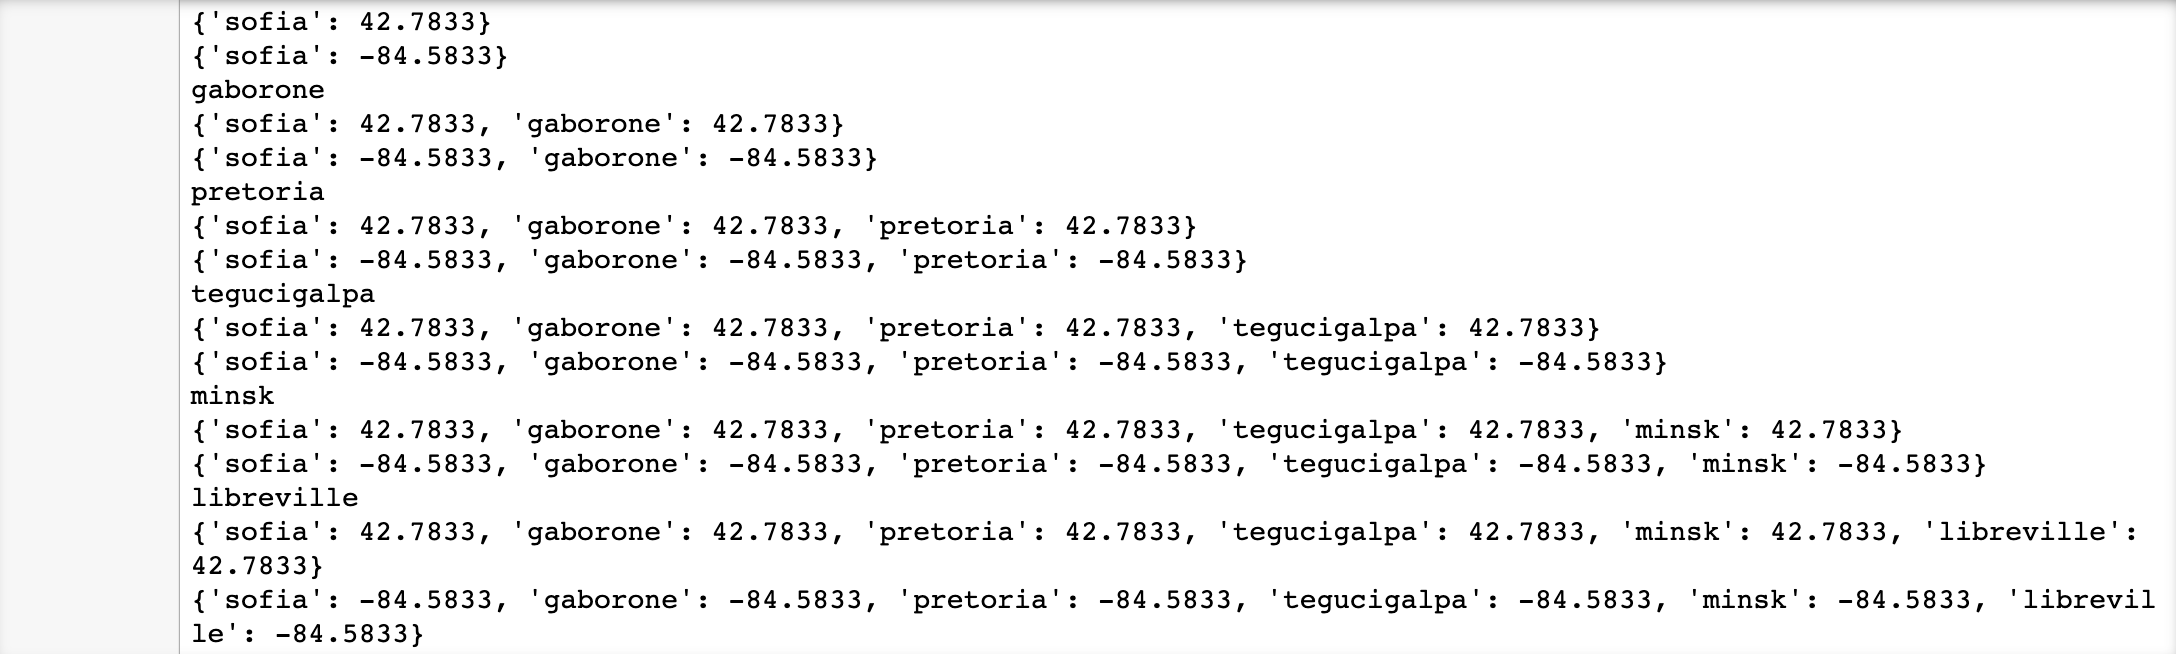

### Manual test call for Amsterdam (Netherlands) 2018-08-27 (one day)

In [125]:
url_weather = "https://api.meteostat.net/v2/point/daily?lat=41.2833&lon=2.0667&start=2018-08-27&end=2018-08-27"

In [126]:
headers = {"x-api-key": getpass.getpass()}

········


In [127]:
r = requests.get(url_weather, headers=headers)

In [128]:
results = r.json()

In [129]:
r.status_code

200

In [130]:
results

{'meta': {'source': 'National Oceanic and Atmospheric Administration, Deutscher Wetterdienst',
  'exec_time': 0.127,
  'generated': '2020-08-28 10:53:26'},
 'data': [{'date': '2018-08-27',
   'tavg': 25.1,
   'tmin': 22.5,
   'tmax': 29,
   'prcp': 0,
   'snow': None,
   'wdir': 240,
   'wspd': 12,
   'wpgt': None,
   'pres': 1016,
   'tsun': None}]}

# Errors and obstacles in retrieving data through the API 

We have spent most of our time to make sure we are able to get the right data from this API, however we encountered many issues:

- We weren't able to continuously access the API the same way. Sometimes it broke with Malon's API key through getpass, whereas for Charlotte it did work with her manual input of the key
- We struggled with writing the loops and, eventually, functions to get the desired data
- The screenshot above shows different outputs of the same code, however with using different API keys

### Final decisions regarding working with the API 

Our main goal of retrieving data through the API is to learn more about:
- going through API documentation
- Structuring the steps and understanding what we need in order get the right data
- Calling the API and understanding the logic
- Working with Python to improve our skill level

We spent a large amount of time on making the API calls work properly. Unfortunately this project is limited in time and, therefore, we have decided to focus on getting the weather data by downloading CSV files. This information will then be merged with the World Happiness Report for further data cleaning and analysis.